In [1]:
import pandas as pd

#read the tracks file with genere 
track = pd.read_csv('fma-rock-vs-hiphop.csv')

#read the tracks with festures
echonest_metrics = pd.read_json('echonest-metrics.json', precise_float=True)

#print the coloumns of the echonest_metrics
print(echonest_metrics.columns)

#merge the two dataframes 
echo_tracks = echonest_metrics.merge(track[['track_id', 'genre_top']], on='track_id')

#check the merged dataframe
echo_tracks.info()


Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [2]:
#feature corelation
#select the numeric columns from echotracks
numeric_columns = echo_tracks.select_dtypes(include=["number"])

#generate the correlation matrix
corr_metrics = numeric_columns.corr()
corr_metrics.style.background_gradient()


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [3]:
'''Use  scikit-learn's `StandardScaler` to normalize the data, ensuring that all features 
contribute equally to the model performance'''

#import train_test_split and decision tree classifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# create features
features = echo_tracks.drop(['genre_top', 'track_id'], axis=1).values

# create labels
labels = echo_tracks['genre_top'].values
#print(labels)

#split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

In [4]:
#normalize the feature data
#import the standard scaler
from sklearn.preprocessing import StandardScaler

#initialize the standard scaler
scaler = StandardScaler()

#fit the scaler with the training data and scale the training data
scaled_train_features = scaler.fit_transform(train_features)

#scale the test data
scaled_test_features = scaler.transform(test_features)


In [5]:
#implement a decision tree classifier to predict the genre of a track based on the scaled feature data
#import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#initialize the decision tree classifier
tree = DecisionTreeClassifier(random_state=10)

#train the decision tree classifier
tree.fit(scaled_train_features, train_labels)

#predict the labels of the test set
pred_labels_tree = tree.predict(scaled_test_features)

In [6]:
#implement a logistic regression classifier to predict the genre of a track based on the scaled feature data
from sklearn.linear_model import LogisticRegression

#initialize the logistic regression classifier
logreg = LogisticRegression(random_state=10)

#train the logistic regression classifier
logreg.fit(scaled_train_features, train_labels)

#predict the labels of the test set
pred_labels_logit = logreg.predict(scaled_test_features)

In [7]:
#create a classification report
from sklearn.metrics import classification_report

#classification report for decision tree
class_rep_tree = classification_report(test_labels, pred_labels_tree)
print("Decision Tree: \n", class_rep_tree)

#classification report for logistic regression
class_rep_log = classification_report(test_labels, pred_labels_logit)
print("Logistic Regression: \n", class_rep_log)


Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.66      0.68      0.67       235
        Rock       0.92      0.92      0.92       966

    accuracy                           0.87      1201
   macro avg       0.79      0.80      0.79      1201
weighted avg       0.87      0.87      0.87      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.80      0.61      0.69       235
        Rock       0.91      0.96      0.94       966

    accuracy                           0.89      1201
   macro avg       0.86      0.79      0.82      1201
weighted avg       0.89      0.89      0.89      1201



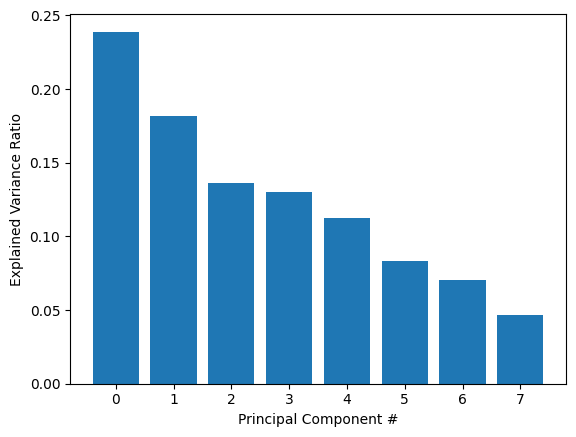

In [8]:
#this is just to make plota appear in the console

#import plotting library and pca class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#initialize the pca
pca = PCA()

#fit the pca with the scaled features
pca.fit(scaled_train_features)
exp_variable = pca.explained_variance_ratio_

#plot the explained variance using a bar plot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variable)
ax.set_xlabel('Principal Component #')
ax.set_ylabel('Explained Variance Ratio')
plt.show()




In [9]:
#visualize the data using PCA
#perform pca with the choosen number of components and project the data onto the principal components
pca = PCA(n_components=6)

#fit and transform the scaled training features using the pca
pca_train_features = pca.fit_transform(scaled_train_features)

#fit and transform the scaled test features using the pca
pca_test_features = pca.transform(scaled_test_features)

In [10]:
#implement a decision tree classifier to predict the genre of a track based on the pca features
#initialize the decision tree classifier
tree = DecisionTreeClassifier(random_state=10)

#train the model
tree.fit(pca_train_features, train_labels)

#predict the labels
pred_labels_tree = tree.predict(pca_test_features)



In [11]:
#implement a logistic regretion to predict the genre of a track based on the pca features
#initialize the logistic regression classifier
log_reg = LogisticRegression()

#train the model
log_reg.fit(pca_train_features, train_labels)

#predict the labels
pred_labels_log = log_reg.predict(pca_test_features)

#create the classification report
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_log)

#print the classification report
print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.62      0.60      0.61       235
        Rock       0.90      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.76      0.76      0.76      1201
weighted avg       0.85      0.85      0.85      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [12]:
#subset a balanced proportion of the data to train the model
hiphop = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

#subset the rock data to be the same length as the hiphop data
rock = rock.sample(hiphop.shape[0], random_state=10)

#concatenate the dataframes rock and hiphop
rock_hiphop = pd.concat([rock, hiphop])

#the features, labels and pca projection are created from the balanced data
features = rock_hiphop.drop(['genre_top', 'track_id'], axis=1).values
labels = rock_hiphop['genre_top'].values

#redeifine the train and test data 
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

In [13]:
#implement a decision tree classifier to predict the genre for balanced data 
#initialize the decision tree classifier
tree = DecisionTreeClassifier(random_state=10)

#train the model
tree.fit(train_pca, train_labels)

#predict the labels
pred_labels_tree = tree.predict(test_pca)

In [14]:
#implement logistic regression to predict the genre for balanced data
#initialize the logistic regression classifier
log_reg = LogisticRegression()

#train the model
log_reg.fit(train_pca, train_labels)

#predict the labels
pred_labels_log = log_reg.predict(test_pca)

#create the classification report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_log)

#print the classification report
print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)


Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.83      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455



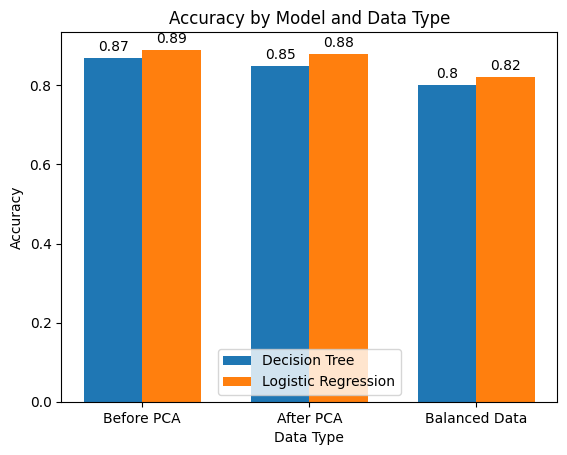

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for each scenario
accuracy_before_pca = [0.87, 0.89]  # [Decision Tree, Logistic Regression]
accuracy_after_pca = [0.85, 0.88]   # [Decision Tree, Logistic Regression]
accuracy_balanced = [0.80, 0.82]    # [Decision Tree, Logistic Regression]

# Labels for the x-axis
labels = ['Before PCA', 'After PCA', 'Balanced Data']

# Create a figure and axis
fig, ax = plt.subplots()

# X-axis positions for the bars
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Plotting the bars
rects1 = ax.bar(x - width/2, [accuracy_before_pca[0], accuracy_after_pca[0], accuracy_balanced[0]], width, label='Decision Tree')
rects2 = ax.bar(x + width/2, [accuracy_before_pca[1], accuracy_after_pca[1], accuracy_balanced[1]], width, label='Logistic Regression')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Data Type')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model and Data Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels to the bars
autolabel(rects1)
autolabel(rects2)

# Display the plot
plt.show()